# convert_meier_h5

This script converts <a href="https://scedc.caltech.edu/data/deeplearning.html#signal_noise">meier</a> dataset waveforms to a dataset, compatible with <a href="https://github.com/interseismic/generalized-phase-detection">gpd california</a> data.

In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import obspy.core as oc

In [2]:
# Modifying sys.path to be able to load project packages
import sys
sys.path.append('../')

In [3]:
# Load project packages
from utils.h5_tools import write_batch

# Function Definitions

In [4]:
def convert_data(dataset, idx):
    """
    Converts data from meier format to requiered:
        1. Detrend.
        2. 2Hz highpass filtering.
        3. Slice.
        4. Local absolute max normalization.
    """
    # Get data
    data = dataset[:, idx, :]
    channels = [data[i, :] for i in range(data.shape[0])]
    
    d_length = data.shape[1]
    r_length = 400
    ch_num = len(channels)
    
    X = np.zeros((r_length, ch_num))
    
    # Process
    for i, chan in enumerate(channels):
        
        trace_data = chan[:r_length]
        trace = oc.Trace(data = trace_data)
        trace.stats.sampling_rate = 100
        
        trace.detrend(type = 'linear')
        trace.filter(type = 'highpass', freq = 2.)
        
        X[:, i] = trace.data
    
    # Normalize
    global_norm = True
    
    if global_norm:
        
        loc_max = np.max(np.abs(X[:, :]))
        X[:, :] = X[:, :] / loc_max
        
    else:
        
        for i in range(ch_num):

            loc_max = np.max(np.abs(X[:, i]))
            X[:, i] = X[:, i] / loc_max
        
    return X.reshape((1, *X.shape))


def plot_original(dataset, idx):
    """
    Plots original data.
    """
    
    # Get data
    data = dataset[:, idx, :]
    channels = [data[i, :] for i in range(data.shape[0])]
    
    ch_num = len(channels)
    
    # Plot init
    fig = plt.figure(figsize = (9, 4), dpi = 80)
    axes = fig.subplots(ch_num, sharex = True)
    
    # ScalarFormatter params
    from matplotlib.ticker import ScalarFormatter
    
    formatter_params = {
        'useOffset': False,
        'useMathText': True
    }
    
    
    for i, ax in enumerate(axes):
        
        ax.plot(channels[i])  # plot data
        
        # Set ScalarFormatter for neat Y-axis labels
        formatter = ScalarFormatter(**formatter_params)
        formatter.set_scientific(True)
        ax.yaxis.set_major_formatter(formatter)
        ax.ticklabel_format(axis = 'y', scilimits = (-3, 3))  # set scientific notation for < 10^(-3) and > 10^3

    fig.tight_layout()


def plot_converted(data):
    """
    Plots converted data.
    """
    
    ch_num = data.shape[2]
    
    # Plot init
    fig = plt.figure(figsize = (9, 4), dpi = 80)
    axes = fig.subplots(ch_num, sharex = True)
    
    # ScalarFormatter params
    from matplotlib.ticker import ScalarFormatter
    
    formatter_params = {
        'useOffset': False,
        'useMathText': True
    }
    
    
    for i, ax in enumerate(axes):
        
        ax.plot(data[0, :, i])  # plot data
        
        # Set ScalarFormatter for neat Y-axis labels
        formatter = ScalarFormatter(**formatter_params)
        formatter.set_scientific(True)
        ax.yaxis.set_major_formatter(formatter)
        ax.ticklabel_format(axis = 'y', scilimits = (-3, 3))  # set scientific notation for < 10^(-3) and > 10^3

    fig.tight_layout()

# Convert dataset

## Initialize Parameters

In [5]:
meier_path = 'C:/data/datasets/MEIER/meier_original.h5'
save_path = 'C:/data/datasets/MEIER/meier_converted_noise.h5'

meier_set_names_stack = ['noise', 'wforms']  # ['noise', 'wforms'] OR ['quake', 'wforms']

batch_size = 100000

start = 0

label = 2
_id = 'meier_noise'

## Convertion

In [6]:
meier_set = h5.File(meier_path, 'r')

for s_name in meier_set_names_stack:
    meier_set = meier_set[s_name]

In [7]:
# Set shape: (channel, waveform, sample)
# Required shape: (waveform, sample, channel)
meier_set

<HDF5 dataset "wforms": shape (3, 945571, 601), type "<f8">

In [ ]:
b = 0

X = np.zeros((batch_size, 400, 3))
Y = np.full(batch_size, label, dtype = int)

for i in range(start, meier_set.shape[1]):
    
    if not i % 100:
        print('idx: ', i)
        
    X[b] = convert_data(meier_set, i)
    
    b += 1
    
    if b == batch_size:
        
        b = 0
        write_batch(save_path, 'X', X)
        write_batch(save_path, 'Y', Y)
        
        print('BATCH SAVED')

if b:
    write_batch(save_path, 'X', X[:b])
    write_batch(save_path, 'Y', Y[:b])

idx:  0
idx:  100
idx:  200
idx:  300
idx:  400
idx:  500
idx:  600
idx:  700
idx:  800
idx:  900
idx:  1000
idx:  1100
idx:  1200
idx:  1300
idx:  1400
idx:  1500
idx:  1600
idx:  1700
idx:  1800
idx:  1900
idx:  2000
idx:  2100
idx:  2200
idx:  2300
idx:  2400
idx:  2500
idx:  2600
idx:  2700
idx:  2800
idx:  2900
idx:  3000
idx:  3100
idx:  3200
idx:  3300
idx:  3400
idx:  3500
idx:  3600
idx:  3700
idx:  3800
idx:  3900
idx:  4000
idx:  4100
idx:  4200
idx:  4300
idx:  4400
idx:  4500
idx:  4600
idx:  4700
idx:  4800
idx:  4900
idx:  5000
idx:  5100
idx:  5200
idx:  5300
idx:  5400
idx:  5500
idx:  5600
idx:  5700
idx:  5800
idx:  5900
idx:  6000
idx:  6100
idx:  6200
idx:  6300
idx:  6400
idx:  6500
idx:  6600
idx:  6700
idx:  6800
idx:  6900
idx:  7000
idx:  7100
idx:  7200
idx:  7300
idx:  7400
idx:  7500
idx:  7600
idx:  7700
idx:  7800
idx:  7900
idx:  8000
idx:  8100
idx:  8200
idx:  8300
idx:  8400
idx:  8500
idx:  8600
idx:  8700
idx:  8800
idx:  8900
idx:  9000
idx:  9100


idx:  69300
idx:  69400
idx:  69500
idx:  69600
idx:  69700
idx:  69800
idx:  69900
idx:  70000
idx:  70100
idx:  70200
idx:  70300
idx:  70400
idx:  70500
idx:  70600
idx:  70700
idx:  70800
idx:  70900
idx:  71000
idx:  71100
idx:  71200
idx:  71300
idx:  71400
idx:  71500
idx:  71600
idx:  71700
idx:  71800
idx:  71900
idx:  72000
idx:  72100
idx:  72200
idx:  72300
idx:  72400
idx:  72500
idx:  72600
idx:  72700
idx:  72800
idx:  72900
idx:  73000
idx:  73100
idx:  73200
idx:  73300
idx:  73400
idx:  73500
idx:  73600
idx:  73700
idx:  73800
idx:  73900
idx:  74000
idx:  74100
idx:  74200
idx:  74300
idx:  74400
idx:  74500
idx:  74600
idx:  74700
idx:  74800
idx:  74900
idx:  75000
idx:  75100
idx:  75200
idx:  75300
idx:  75400
idx:  75500
idx:  75600
idx:  75700
idx:  75800
idx:  75900
idx:  76000
idx:  76100
idx:  76200
idx:  76300
idx:  76400
idx:  76500
idx:  76600
idx:  76700
idx:  76800
idx:  76900
idx:  77000
idx:  77100
idx:  77200
idx:  77300
idx:  77400
idx:  77500
idx:

idx:  134600
idx:  134700
idx:  134800
idx:  134900
idx:  135000
idx:  135100
idx:  135200
idx:  135300
idx:  135400
idx:  135500
idx:  135600
idx:  135700
idx:  135800
idx:  135900
idx:  136000
idx:  136100
idx:  136200
idx:  136300
idx:  136400
idx:  136500
idx:  136600
idx:  136700
idx:  136800
idx:  136900
idx:  137000
idx:  137100
idx:  137200
idx:  137300
idx:  137400
idx:  137500
idx:  137600
idx:  137700
idx:  137800
idx:  137900
idx:  138000
idx:  138100
idx:  138200
idx:  138300
idx:  138400
idx:  138500
idx:  138600
idx:  138700
idx:  138800
idx:  138900
idx:  139000
idx:  139100
idx:  139200
idx:  139300
idx:  139400
idx:  139500
idx:  139600
idx:  139700
idx:  139800
idx:  139900
idx:  140000
idx:  140100
idx:  140200
idx:  140300
idx:  140400
idx:  140500
idx:  140600
idx:  140700
idx:  140800
idx:  140900
idx:  141000
idx:  141100
idx:  141200
idx:  141300
idx:  141400
idx:  141500
idx:  141600
idx:  141700
idx:  141800
idx:  141900
idx:  142000
idx:  142100
idx:  142200

In [15]:
idx = 15

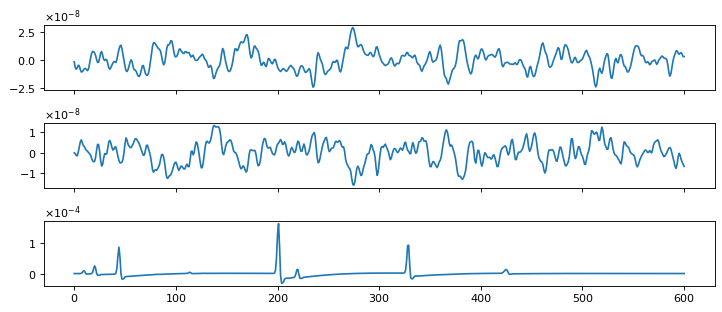

In [16]:
plot_original(meier_set, idx)

In [17]:
c_data = convert_data(meier_set, idx)

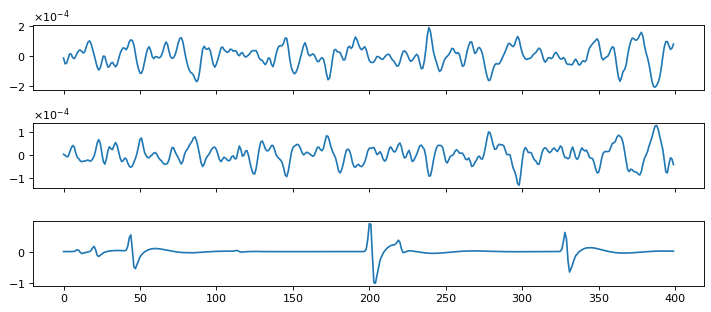

In [18]:
plot_converted(c_data)